# **1 - Perkenalanan**

Nama. : Josua Yerico

Batch : FTDS-001-Hck

Dataset : https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

Objective : Pembuatan model Classification untuk memprediksi pasien stroke menggunakan dataset brain-stroke_default

# **2 - Import Libaries**

In [1]:
# Define libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import plot_confusion_matrix
import pickle

from imblearn.over_sampling import SMOTE

#for feature encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#Calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

#Handling outlier
from feature_engine.outliers import Winsorizer

#for feature scalling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 

#For Classification Problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

#Spil Dataset and Standarize the Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate clasification Models
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#for Hyperparameter
from sklearn.model_selection import GridSearchCV

#for correlation test with heatmap method
import phik


#for pipeline
from imblearn.pipeline import Pipeline
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
from sklearn.compose import ColumnTransformer

import warnings
warnings.simplefilter('ignore')

# **3 - Data Loading**

Pada kasus ini data diambil dari https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

Berikut merupakan dataset pasien rumah sakit:

In [2]:
# Load Dataset to notebook
data = pd.read_csv('brain_stroke.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
#Duplicate dataframe
data_copy = data.copy()

Berikut merupakan data teratas dari dataset tersebut:

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Berikut merupakan data terbawah dari dataset tersebut:

In [5]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


## Check Mising Value pada target dan feature

Berikut merupakan informasi dari dataset tersebut:

In [6]:
#Check 1: check data type and mising value in dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Berdasarkan data tersebut tidak terdapat mising value pada dataset tersebut. 

In [7]:
#Check 2: make sure mising value with max, min, Q1, Q2, and Q3 in dataset 
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


berdasarkan informasi dari central tendecy tersebut, tidak terdapat data yang anomali atau keanehan pada dataset tersebut.

## Check Duplicates data pada feature dan target

In [8]:
#Check 3: Data Duplicate #1
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4976    False
4977    False
4978    False
4979    False
4980    False
Length: 4981, dtype: bool

berdasarkan data overview tersebut, Tidak terdapat duplikasi data pada dataset tersebut.

## Replace data 'Unknown' pada feature smoking_status

In [9]:
#check 4: unknown on feature smoking_status
data.loc[data['smoking_status'] == 'Unknown'].shape

(1500, 11)

In [10]:
#replace unknown to never smoked on feature smoking_status
data.loc[data['smoking_status'] == 'Unknown', 'smoking_status'] = 'never smoked'

Dikarenakan model prediksi tersebut akan dibuat deploymentnya, maka kolom hypertension dan heart disease diubah menjadi data categorical supaya memudahkan user atau pasien dalam menginput datanya dan meminimalisir kesalah penginputan data.

In [11]:
data['hypertension'] = data['hypertension'].replace({0:'NO', 1: 'Yes'})
data['heart_disease'] = data['heart_disease'].replace({0:'NO', 1: 'Yes'})

Berikut dataset terakhir setelah dibersihkan:

In [12]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,NO,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,NO,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,NO,NO,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,Yes,NO,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,NO,NO,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,NO,NO,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,NO,NO,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,Yes,NO,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,NO,NO,Yes,Private,Rural,83.94,30.0,smokes,0


# **4 - Exploratory Data Analysis (EDA)**

pada kasus ini akan dibuat sebuah model untuk memprediksi apakah seseorang terdiagnosa atau berpotensi terkena penyakit stroke atau tidak? hal tersebut  dapat dipengaruhi oleh beberapa faktor. faktor tersebut diantaranya: usia, jenis pekerjaan, tingkat hipertensi pasien, kesehatan jantung, berat badan, kadar glukosa dalam tubuh pasien, dan apakah pasien tersebut merokok atau tidak. untuk melihat hubungan feature tersebut terhadap target seseorang diperlukan analisis data melalui visualisasi data.

sebelum melakukan visualisasi perlu dilakukan pemisahan 10 sample dari dataset sebagai data baru untuk mengetahui apakah model tersebut telah akurat dalam memprediksi masalah tersebut

## Get Data for Model Inference

Berikut merupakan 10 sample data secara random dari dataset tersebut:

In [13]:
# Get Data for Model Inference
data_inf = data.sample(10, random_state=17)

# Remove Inference-Set from Dataset
data_train_test = data.drop(data_inf.index)

# Reset Index 
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,75.0,NO,NO,Yes,Self-employed,Urban,96.95,41.4,never smoked,0
1,Female,7.0,NO,NO,No,children,Rural,63.98,23.0,never smoked,0
2,Male,74.0,Yes,NO,Yes,Self-employed,Urban,112.54,27.7,formerly smoked,0
3,Male,9.0,NO,NO,No,children,Urban,93.24,31.9,never smoked,0
4,Male,68.0,NO,NO,Yes,Self-employed,Urban,195.43,28.9,never smoked,0
5,Female,46.0,NO,NO,Yes,Private,Urban,61.81,25.5,never smoked,0
6,Male,32.0,NO,NO,Yes,Private,Rural,72.34,32.2,never smoked,0
7,Female,69.0,NO,NO,Yes,Self-employed,Urban,99.68,17.6,formerly smoked,0
8,Male,64.0,Yes,NO,Yes,Private,Rural,91.85,31.8,formerly smoked,0
9,Female,31.0,NO,NO,Yes,Self-employed,Urban,82.31,31.9,never smoked,0


## Visualisasi Data

Pada bagian ini akan diperlihatkan distribusi data numeric pada dataset tersebut apakah terdistribusi normal atau tidak?? apakah perlu dilakukan handling outlier atau tidak?. selain itu, akan dilihat presentase jumlah pasien yang terkena stroke yang diakibatkan karena pasien tersebut merokok dan berapa pasien yang terkena stroke karena hypertensi. bukan hanya itu, pada bagian ini juga akan diperlihatkan bagaimana hubungan pekerjaan dan tempat tinggal terhadap pasien yang terdiagnosis atau potensi terkena stroke. apakah ada pengaruh tempat tinggal dan jenis pekerjaan dengan pasien yang terkena stroke. serta menentukan berapa rata - rata berat badan dan usia pasien yang terkena stroke. apakah ada potensi usia muda untuk terkena penyakit stroke.

## Check Distribution Data

Text(0.5, 1.0, 'Distribution Data bmi')

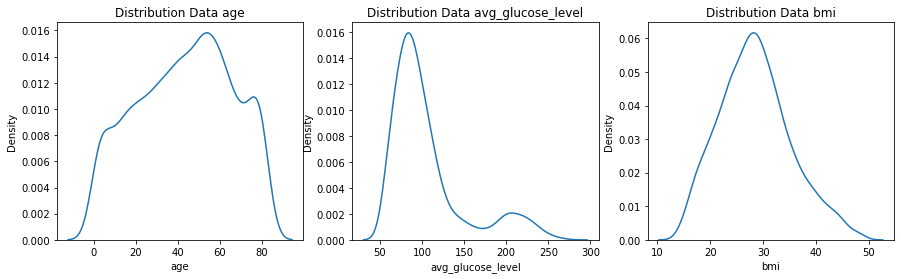

In [140]:
#check 4: check outlier and distribution data on feature with visualization
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.kdeplot(data=data, x='age')
plt.title('Distribution Data age')

plt.subplot(1,3,2)
sns.kdeplot(data=data, x='avg_glucose_level')
plt.title('Distribution Data avg_glucose_level')

plt.subplot(1,3,3)
sns.kdeplot(data=data, x='bmi')
plt.title('Distribution Data bmi')

Berdasarkan grafik overview dapat diketahui bahwa:
1. feature avg_glucose_level memiliki dua peak dan terdistribusi tidak normal. sehingga feature tersebut diperlukan handling outlier untuk meminimalisir kesalahan/error pada model
2. feature age dan bmi memiliki satu peak. akan tetapi feature bmi terdistribusi tidak normal dan feature age terdistribusi normal. pada feature tersebut tidak dibutuhkan handling outlier. untuk memastikan hal demikian akan dilakukan uji dengan nilai skew
3. beberapa feature memiliki outlier dan perlu dilakukan handling outlier untuk mempermudah model dalam  mempelajari pola datanya


In [15]:
# define a function to visualize target distribution
def targetdist(df, target):
    plt.figure(figsize=(7,5))

    _=sns.countplot(x=df[target])
    _.bar_label(_.containers[0]);

    pct_0 = df[target].value_counts()[0]*100 / df.shape[0]

    _.set_xticklabels([f'0 ({pct_0:.2f}%)', f'1 ({100-pct_0:.2f}%)']);
    _.set_title(f'Target Distribution')
    _.grid(False)
    sns.despine()

    plt.tight_layout;


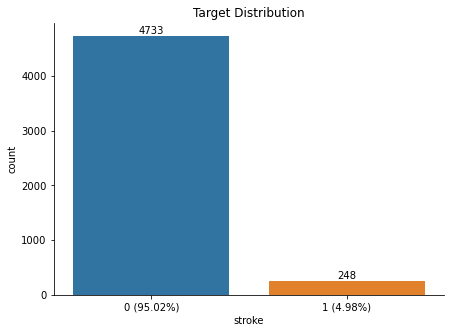

In [16]:
#Visualization data target
targetdist(data, 'stroke')

berdasarkan data overview terdapat data imbalance yang cukup signifikan antara pasien yang terkena stroke (4.98%) dengan pasien yang tidak terkena stroke (95.02%). oleh karena itu, pada kasus ini diperlukan untuk melakukan handling data imbalance.

## Faktor Penyebab Riwayat Penyakit terhadap Pasien Stroke

In [17]:
#dataset patient stroke
stoke_data = data[data['stroke'] == 1]

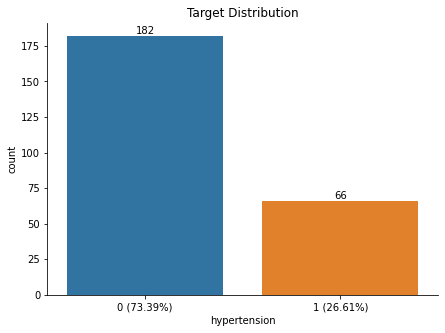

In [18]:
#Visualization hypertension with target (stroke = 1)
targetdist(stoke_data, 'hypertension')


0 pada tersebut merupakan pasien yang tidak memiliki hipertensi (darah tinggi) dan 1 pada tersebut merupakan pasien yang memiliki hipertensi (darah tinggi). berdasarkan data tersebut, pasien yang terkena penyakit stroke tidak memiliki riwayat penyakit atau tidak sedang mengalami hypertension (darah tinggi). hal tersebut terlihat pada grafik, pasien yang tidak punya penyakit darah tinggi (73.39%) lebih banyak terkena stroke daripada pasien yang memiliki penyakit darah tinggi (26.61%). hal ini berarti pasien yang terkena stroke tidak disebabkan karena pasien tersebut mengalami darah tinggi. justru seseorang yang tidak memiliki darah tinggi juga berpotensi untuk mengalami stroke

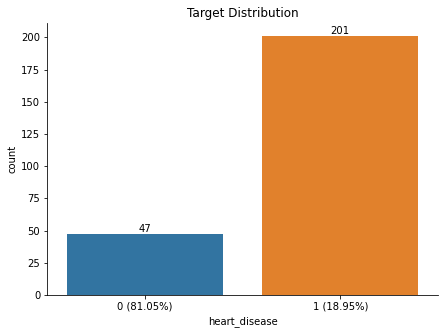

In [19]:
#visualization heart disease with target (stroke = 1)
targetdist(stoke_data, 'heart_disease')

0 pada data tersebut merupakan pasien yang tidak memiliki riwayat penyakit jantung dan 1 pada tersebut merupakan pasien yang memiliki riwayat penyakit jantung. berdasarkan data tersebut pasien dengan riwayat penyakit jantung (18.95%) lebih banyak daripada pasien yang tidak memiliki riwayat penyakit jantung. hal tersebut berarti pasien yang terkena stroke tidak disebabkan oleh pasien memiliki riwat penyakit jantung atau tidak atau pasien tersebut sedang mengalami penyakkit jantung atau tidak. justru seseorang yang tidak memiliki penyakit jantung sangat berpotensi untuk terkena stroke

## Pengaruh Merokok dan Pekerjaan terhadap penyakit stroke

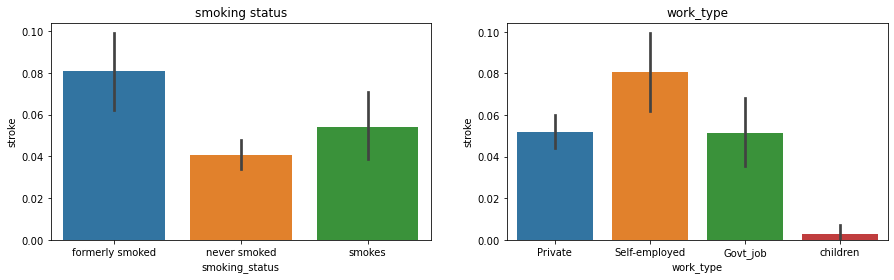

In [20]:
plt.figure(figsize=(15, 4))

#visualization smoking status with target 
plt.subplot(1, 2, 1)
sns.barplot(data=data, x = 'smoking_status', y='stroke')
plt.title('smoking status')

#visualization work type with target 
plt.subplot(1, 2, 2)
sns.barplot(data=data, x = 'work_type',  y='stroke')
plt.title('work_type')

plt.show()

Berdasarkan grafik tersebut, seseorang yang pernah merokok dan sedang merokok memiliki potensi untuk terkena stroke. hal ini terlihat dari grafik bahwa pasien yang terkena atau terdiagnosis penyakit stroke memiliki latar belakang sebagai perokok. selain itu jenis pekerjaan seseorang memiliki berpengaruh terhadap seseorang tersebut terkena penyakit stroke atau tidak. berdasarkan grafik tersebut, jenis pekerjaan yang memiliki potensi terkena penyakit stroke adalah self - employed (golongan pengusaha atau yang memiliki bisnis sendiri). hal ini dikarenakan pengusaha memiliki beban pikiran yang lebih besar dibanding dengan pekerjaan lain seperti staff, karyawan, dll. grafik tersebut menginformasikan bahwa anak - anak memiliki potensi yang sangat kecil terhadap penyakit stroke

## Pengaruh Usia, kadar glukosa dalam tubuh, dan BMI terhadap penyakit stroke

Text(0.5, 1.0, 'avg_glucose_level vs stroke')

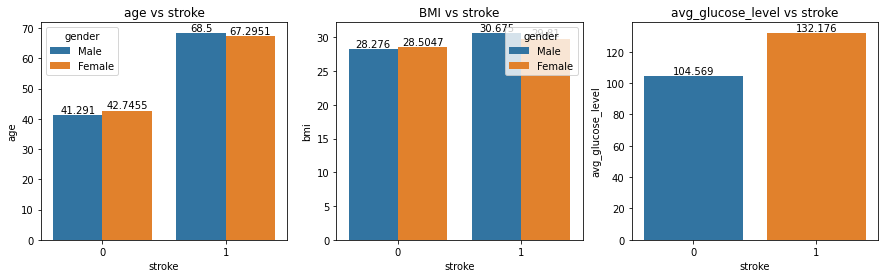

In [21]:
from statistics import mean

plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
_=sns.barplot(data=data, x = 'stroke', y = 'age', estimator=mean, hue='gender',ci=None)
_.bar_label(_.containers[0])
_.bar_label(_.containers[1])
plt.title('age vs stroke')

plt.subplot(1,3,2)
_=sns.barplot(data=data, x = 'stroke', y = 'bmi', estimator=mean, hue='gender',ci=None)
_.bar_label(_.containers[0])
_.bar_label(_.containers[1])
plt.title('BMI vs stroke')

plt.subplot(1,3,3)
_=sns.barplot(data=data, x = 'stroke', y = 'avg_glucose_level', estimator=mean, ci=None)
_.bar_label(_.containers[0])
plt.title('avg_glucose_level vs stroke')

Berdasarkan grafik tersebut terlihat bahwa tidak ada hubungannya antara usia dan berat badan terhadap penyakit stroke. akan tetapi, kadar gula dalam tubuh memiliki korelasi terhadap penyakit stroke. rata - rata pasien yang terkena stroke memiliki kadar gula yang tinggi dibanding dengan pasien yang tidak terkena stroke. hal ini berarti gula darah dapat menyebabkan seseorang terkena penyakit stroke atau penyakit stroke dapat menyebabkan seseorang memiliki gula yang tinggi. untuk melihat hubungan tersebut diperlukan uji analisis lebih lanjut

## Pengaruh lingkungan/tempat tinggal terhadap penyakit stroke

Text(0.5, 1.0, 'Residence_type')

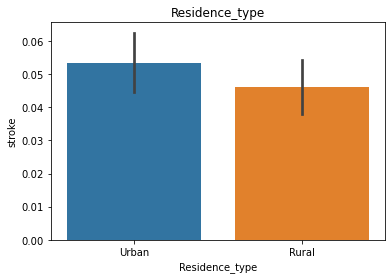

In [22]:
#visualization Residence_type terhadap target
sns.barplot(data=data, x = 'Residence_type', y='stroke')
plt.title('Residence_type')

Berdasarkan grafik tersebut penyakit stroke tidak berpengaruh pada tempat tinggal/lingkungan seseorang. masyarakat perkotaan dan masyarakat perdesaan masing - masing memiliki potensi untuk terkena penyakit stroke

## Splitting between X (Features) and y (Target) and Spliting data training dan data test

sebelum dilakukan analisis lebih lanjut terhadap dataset tersebut, diperlukan pemisahan data antar feature dan target serta pemisahan data antara data train dengan data test. hal ini bertujuan untuk menghindari adanya kebocoran data untuk data test

In [23]:
# Split between `X` (Features) and `y` (Target)
X = data_train_test.drop('stroke', axis=1) 
y = data_train_test['stroke']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3479, 10)
Test Size  :  (1492, 10)


## Feature Selection

Setelah memisahkan data training dan test, dilakukan pemilihan feature. pemilihan feature bertujuan untuk memudahkan dalam proses analisis sehingga tidak terlalu feature yang dianalisis. selain itu, pemilihan feature bertujuan untuk memudahkan dalam membuat model prediksi penyakit stroke serta dapat memudahkan model dalam menentukan pola data yang memengaruhi terbentuknya target (stroke)

In [24]:
#combine features and target for feature selection
X_train_copy = X_train.copy()
X_train_copy['stroke'] = y_train

## Correlation Test

pada bagian ini akan dilakukan uji korelasi mengunakan grafik heatmap. hal ini ingin melihat seberapa kuat hubungan antara berbagai feature terhadap target dan seberapa kuat hubungan antara feature dengan feature. hubungan feature dengan target yang kuat akan memudahkan model untuk membaca pola dan model yang dibuat dapat memprediksi penyakit stroke secara akurat. sebaliknya hubungan feature dengan feature yang kuat akan menyulitkan model untuk membaca pola dan model yang dibuat tidak dapat memprediksi stroke secara akurat.

interval columns not set, guessing: ['age', 'avg_glucose_level', 'bmi', 'stroke']


<AxesSubplot:title={'center':'Correlation Heatmap between feature and target/feature'}>

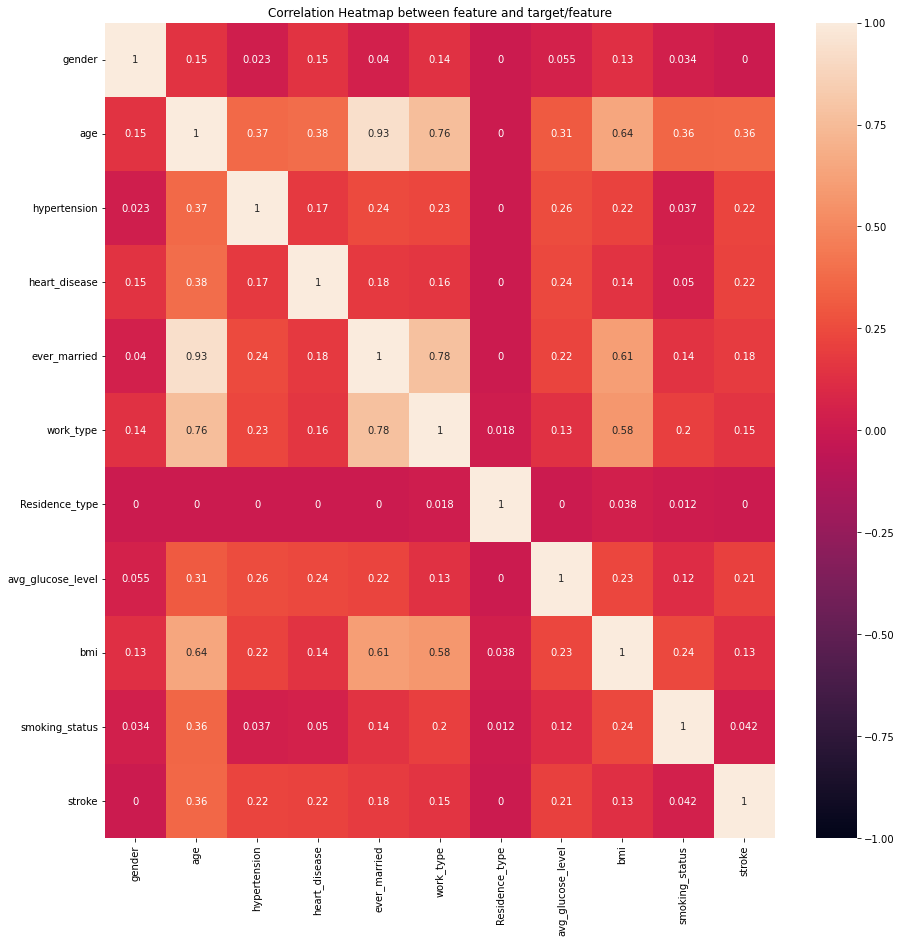

In [25]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Heatmap between feature and target/feature')
sns.heatmap(X_train_copy.phik_matrix(), vmin=-1, vmax=1, annot=True)

Berdasarkan grafik heatmap tersebut, usia memili korelasi yang sangat kuat terhadap penyakit stroke. hal ini dikarenakan usia yang semakin tinggi menyebabkan seseorang tersebut mudah terkena penyakit stroke. akan tetapi, feature avg_glucose_level, work_type, ever married, heart disease, bmi dan hypertension memiliki korelasi yang cukup kuat terhadap target. oleh karena itu feature yang akan dipilih dalam memprediksi penyakit stroke adalah age, avg_glucose_level, work_type, ever married, heart disease, bmi dan hypertension.

In [26]:
#dataframe after selection each feature
X_train_ok = X_train[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married', 'work_type', 'bmi']]
X_test_ok =  X_test[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married', 'work_type', 'bmi']]

Berikut dataframe dari feature - feature yang dipakai dalam pembuatan model prediksi default payment next month

In [27]:
X_train_ok.reset_index(drop=True)

,age,hypertension,heart_disease,avg_glucose_level,ever_married,work_type,bmi
0,46.0,NO,NO,83.88,Yes,Govt_job,27.1
1,14.0,NO,NO,116.49,No,children,30.3
2,77.0,Yes,Yes,80.92,Yes,Self-employed,28.9
3,10.0,NO,NO,93.64,No,children,23.4
4,61.0,NO,NO,69.77,Yes,Self-employed,29.9
...,...,...,...,...,...,...,...
3474,8.0,NO,NO,62.69,No,children,28.7
3475,55.0,NO,NO,112.46,Yes,Private,27.3
3476,17.0,NO,NO,63.28,No,Private,40.2
3477,40.0,NO,NO,100.35,No,Private,28.1


## Handling Outlier

handling outlier dilakukan bertujuan untuk menghindari adanya nilai anomali pada dataset. nilai anomali pada kasus ini adalah nilai - nilai pada feature dengan nilai sangat besar atau nilai sangat kecil dengan frekuensi kemunculan yang sangat kecil. hal ini bertujuan untuk mempermudah model dalm mempelajari pola data nya dan meminimalisir kesalahan/ error saat model memprediksi data baru.

In [28]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train_fix, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_fix[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train_fix[variable])
    plt.title('Boxplot')

    plt.show()

## Skewness

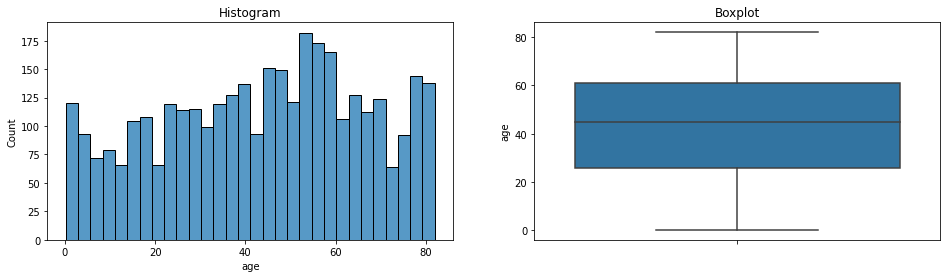


Skewness Value :  -0.16778560534354076


In [29]:
# let's inspect now the variable age from X_train
# refers to the age of the passengers on board

diagnostic_plots(X_train_ok, 'age')
print('\nSkewness Value : ', X_train_ok['age'].skew())

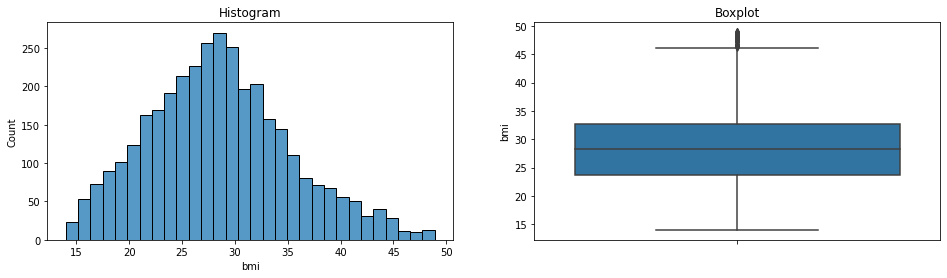


Skewness Value :  0.36456683651005967


In [30]:
# let's inspect now the variable bmi from X_train
# refers to the bmi of the passengers on board

diagnostic_plots(X_train_ok, 'bmi')
print('\nSkewness Value : ', X_train_ok['bmi'].skew())

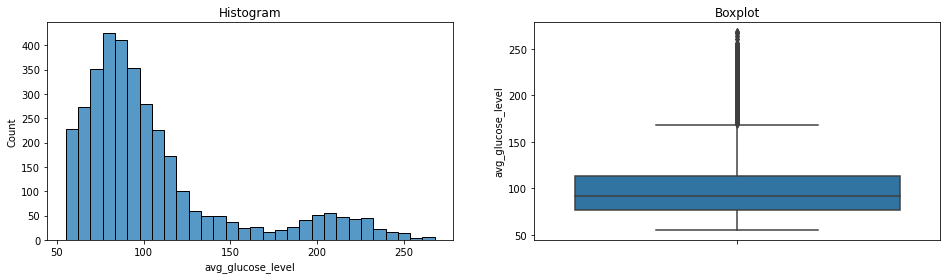


Skewness Value :  1.5888010016123646


In [31]:
# let's inspect now the variable avg_glucose_level from X_train
# refers to the avg_glucose_level of the passengers on board

diagnostic_plots(X_train_ok, 'avg_glucose_level')
print('\nSkewness Value : ', X_train_ok['avg_glucose_level'].skew())

Berdasarkan grafik overview tersebut didapat bahwa:
1. feature age memiliki distribusi normal dan tidak terdapat outliernya
2. feature avg_glucose_level memiliki distribusi tidak normal dan terdapat beberapa outlier pada feature tersebut. sehingga feature tersebut perlu dilakukan handling outliernya.

## IQR, Upper Limit, and Lower Limit

In [32]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# limit passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = X_train_ok[variable].quantile(0.75) - X_train_ok[variable].quantile(0.25)

    lower_boundary = X_train_ok[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = X_train_ok[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [33]:
# Limits for 'avg_glucose_level'
limit_upper_limit, limit_lower_limit = find_skewed_boundaries(X_train_ok, 'avg_glucose_level', 3)
limit_upper_limit, limit_lower_limit


print('avg_glucose_level_upper_limit : ', limit_upper_limit)
print('avg_glucose_levellower_limit : ', limit_lower_limit, '\n')

avg_glucose_level_upper_limit :  223.65000000000006
avg_glucose_levellower_limit :  -33.460000000000065 



## Outlier and Cleaning from outlier

In [34]:
# Flag the outliers in category `avg_glucose_level`
outliers_limit = np.where(X_train_ok['avg_glucose_level'] > limit_upper_limit, True,
                       np.where(X_train_ok['avg_glucose_level'] < limit_lower_limit, True, False))


print('bool outlier avg_glucose_level:',outliers_limit[:10])

bool outlier avg_glucose_level: [False False False False False False False False  True False]


In [35]:
#Handling outlier with capping method
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['avg_glucose_level'])

windsoriser.fit_transform(X_train_ok)

X_train_fix = windsoriser.transform(X_train_ok)
X_test_fix = windsoriser.transform(X_test_ok)

## Cleaning data outlier with capping censoring method

In [36]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'avg_glucose_level': -33.460000000000065}
Right Tail Caps :  {'avg_glucose_level': 223.65000000000006}


In [37]:
print('X_train Dataframe - Before Capping')
print(X_train_ok.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_fix.describe())

X_train Dataframe - Before Capping
               age  avg_glucose_level          bmi
count  3479.000000        3479.000000  3479.000000
mean     43.642782         105.554458    28.524605
std      22.594281          44.761166     6.761767
min       0.160000          55.220000    14.000000
25%      26.000000          76.730000    23.750000
50%      45.000000          91.680000    28.200000
75%      61.000000         113.460000    32.700000
max      82.000000         267.760000    48.900000

X_train Dataframe - After Capping
               age  avg_glucose_level          bmi
count  3479.000000        3479.000000  3479.000000
mean     43.642782         105.121779    28.524605
std      22.594281          43.495466     6.761767
min       0.160000          55.220000    14.000000
25%      26.000000          76.730000    23.750000
50%      45.000000          91.680000    28.200000
75%      61.000000         113.460000    32.700000
max      82.000000         223.650000    48.900000


distance - Before Capping


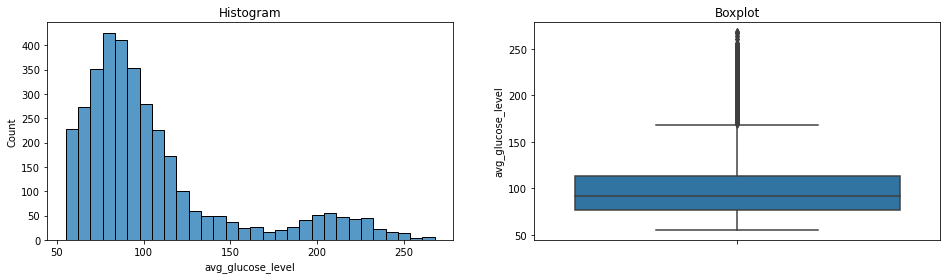

distance - After Capping


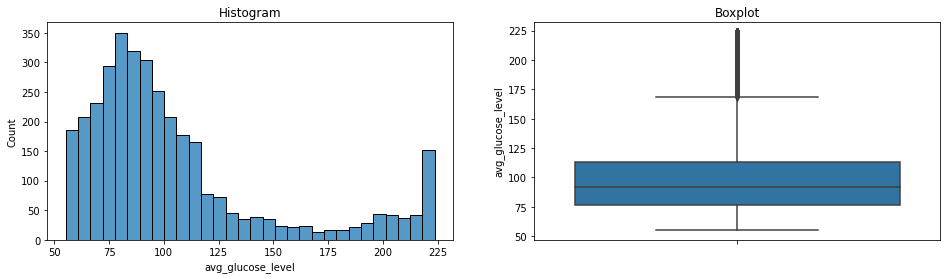

In [38]:
# Let's find outliers in `limit_balance`

print('distance - Before Capping')
diagnostic_plots(X_train_ok, 'avg_glucose_level')
print('distance - After Capping')
diagnostic_plots(X_train_fix, 'avg_glucose_level')

In [39]:
#check skewness feature avg_glucose_level after capping
print('\nSkewness Value : ', X_train_fix['avg_glucose_level'].skew())


Skewness Value :  1.4980858172199656


Berdasarkan grafik overview tersebut, feature avg_glucose_level masih tidak memiliki distribusi normal. akantetapi feature tersebut tidak memiliki nilai outlier

## Split between Numerical Columns and Categorical Columns 

In [40]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_fix.select_dtypes(include=np.number).columns.tolist() 
cat_columns = X_train_fix.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['age', 'avg_glucose_level', 'bmi']
Categorical Columns :  ['hypertension', 'heart_disease', 'ever_married', 'work_type']


In [41]:
# Split Train-Set and Test-Set based on Column Types 

X_train_num = X_train_fix[num_columns]
X_train_cat= X_train_fix[cat_columns]
X_test_num =X_test_fix[num_columns]
X_test_cat = X_test_fix[cat_columns]

## Feature Scalling

Feature scalling bertujuan untuk memperkecil range nilai pada feature sehingga model tidak kesulitan dalam mempelajari pola datanya dan menghasilkan tingkat keakurasian yang tinggi pada performa model dalam memprediksi kasus ini.

In [43]:
# Feature Scaling using MinMaxScaller

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_tf_num_scaled = scaler.transform(X_train_num)
X_tf_num_scaled_ok = pd.DataFrame(X_tf_num_scaled, columns=['age', 'avg_glucose_level', 'bmi']).reset_index(drop=True)
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled_ok = pd.DataFrame(X_test_num_scaled, columns=['age', 'avg_glucose_level', 'bmi']).reset_index(drop=True)

In [44]:
#X_tf_num_scaled_final = pd.concat([feature_final, X_tf_num_scaled_ok], axis=1).reset_index(drop=True)
#X_test_num_scaled_final = pd.concat([feature_test_final, X_test_num_scaled_ok], axis=1).reset_index(drop=True)

## Feature Encoding

dikarenakan model tidak dapat mempelajari data yang bertype string/text, maka feature - feature yang bertype data string/text/object diubah menjadi data bertype numerical dengan mengunakan metode enconding.

In [45]:
encoder = OneHotEncoder()

encoder.fit_transform(X_train_cat)

X_train_encoded = encoder.transform(X_train_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_ok = pd.DataFrame(X_train_encoded).reset_index(drop=True)
X_test_cat_ok = pd.DataFrame(X_test_encoded).reset_index(drop=True)

## Concate between Numerical Columns and Categorical Columns

In [46]:
# Concat columns
X_train_fix = pd.concat([X_tf_num_scaled_ok, X_train_cat_ok], axis=1)
X_test_final = pd.concat([X_test_num_scaled_ok, X_test_cat_ok], axis=1)

## Data Imbalance

pada kasus ini perlu dilakukan handling mbalance dikarenakan data dengan pasien yang terkena stroke lebih sedikit dibanding pasien yang tidak terkena stroke. hal ini bertujuan supaya model dapat memprediksi dengan tepat seseorang yang berpotensi stroke dengan yang tidak

<AxesSubplot:xlabel='stroke', ylabel='count'>

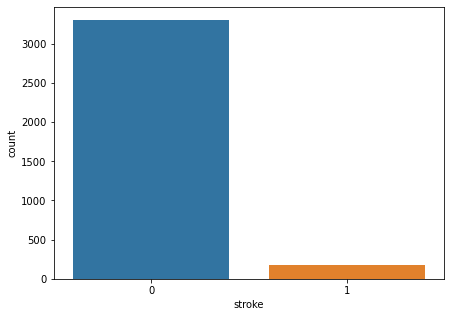

In [47]:
plt.figure(figsize=(7, 5))
sns.countplot(y_train)

In [48]:
#handling data imbalance

X_train_final, y_train_final = SMOTE(sampling_strategy='minority', random_state=42).fit_resample(X_train_fix, y_train)
y_train_final.value_counts()

0    3305
1    3305
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

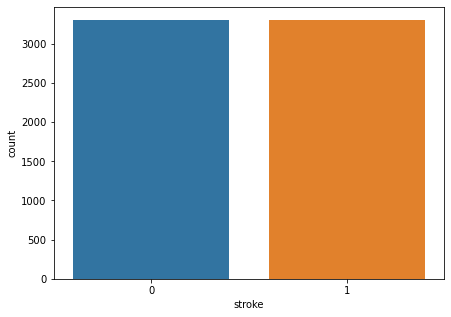

In [49]:
#makesure data imbalance
plt.figure(figsize=(7, 5))
sns.countplot(y_train_final)

# **6 - Model Definition**

## Logistic Regression

In [50]:
# Training using logistic Regression

logreg = LogisticRegression()

## SVM

In [51]:
# Training using SVM
SVM = SVC(probability=True)

## Random Forest

In [52]:
# Training using  Random forest
RF = RandomForestClassifier()

## LightGBM

In [53]:
lgbm = LGBMClassifier()

## KNN

In [54]:
knn = KNeighborsClassifier()

# **7 - Model training**

## Logictic Reggression

In [55]:
# Train the Model
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

## SVM

In [56]:
# Train the Model
SVM.fit(X_train_final, y_train_final)

SVC(probability=True)

## Random Forest

In [57]:
# Train the Model
RF.fit(X_train_final, y_train_final)

RandomForestClassifier()

## LightGBM

In [58]:
# Train the Model
lgbm.fit(X_train_final, y_train_final)

LGBMClassifier()

In [59]:
# Train the Model
knn.fit(X_train_final, y_train_final)

KNeighborsClassifier()

# **8 - Model Evaluation**

## Logistic Regresion

Pada kasus ini diharapkan model tidak salah dalam memprediksi seseorang yang harusnya berpotensial untuk terkena stroke, ternyata hasil prediksi mengatakan bahwa seseorang tersebuttidak berpotensial terkena stroke (FP). hal tersebut dapat mengakibatkan orang tersebut menjadi tidak aware terhadap kesehatannya dan tetap memakan makanan yang dapat memicu penyakit stroke seperti makanan berkolestrol,dll. untuk meminimalisir hal tersebut, maka dalam mengevaluasi model diperlukan nilai recall. hal tersebut dikarenakan pada kasus ini lebih diharapkan model salah memprediksi seseorang yang seharusnya berpotensi tidak kena stroke tepai hasil prediksi berpotensi kena stroke (FN). jika nilai recall tinggi, maka kemungkinan model salah prediksi semakin kecil semakin kecil. selain itu, nilai recall pada kasus ini digunakan karena dataset yang digunakan dalam membuat merupakan data imbalance. data imbalance pada kasus ini merupakan data dimana jumlah pasien yang terkena stroke (5%) jauh lebih sedikit dibanding pasien yang tidak terkena stroke (95%). oleh karena itu, diperlukan handling data imbalance dengan data yang random supaya seolah - olah jumlah pasien stroke sama dengan jumlah pasien yang tidak stroke. akan tetapi, handling imbalance hanya dilakukan pada data train saja. oleh karena itu, untuk melihat keakurasi model dalam memprediksi seorang berpotensi stroke pada data digunakan nilai akurasi dan pada data test digunakan nilai recall.

pada model logistic reggression didapat nilai accuracy pada train adalah 0.78 (78%). hal tersebut berarti model sudah cukup akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak. akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.75(75%), dan 1 = 0.76 (76%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 dan nilai 1, artinya model tersebut dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 tidak terlalu besar. oleh karena itu, model logistic reggression sudah cukup bagus digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. 

## SVM

In [61]:
# Predict Train-Set and Test-Set 

y_pred_train = SVM.predict(X_train_final)
y_pred_test = SVM.predict(X_test_final)

y_proba_train = SVM.predict_proba(X_train_final)
y_proba_test = SVM.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train_final,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train_final,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      3305
           1       0.77      0.89      0.82      3305

    accuracy                           0.81      6610
   macro avg       0.82      0.81      0.81      6610
weighted avg       0.82      0.81      0.81      6610

ROC AUC Score: 0.8806665735911068


Test
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1418
           1       0.12      0.69      0.20        74

    accuracy                           0.73      1492
   macro avg       0.55      0.71      0.52      1492
weighted avg       0.94      0.73      0.81      1492

ROC AUC Score: 0.7997465024968551



pada model SVM didapat nilai accuracy pada train adalah 0.81 (81%). hal tersebut berarti model sudah cukup akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak. akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.73(73%), dan 1 = 0.69 (69%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan perbedaan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 dan nilai 1, artinya model tersebut dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 tidak terlalu besar. oleh karena itu, model SVM sudah cukup bagus digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. akan tetapi, performa model svm masih kurang bagus jika dibandingkan dengan model logistic reggression

## Random Forest

In [62]:
# Predict Train-Set and Test-Set 

y_pred_train = RF.predict(X_train_final)
y_pred_test = RF.predict(X_test_final)

y_proba_train = RF.predict_proba(X_train_final)
y_proba_test = RF.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train_final,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train_final,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3305
           1       1.00      1.00      1.00      3305

    accuracy                           1.00      6610
   macro avg       1.00      1.00      1.00      6610
weighted avg       1.00      1.00      1.00      6610

ROC AUC Score: 1.0


Test
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1418
           1       0.14      0.31      0.19        74

    accuracy                           0.87      1492
   macro avg       0.55      0.61      0.56      1492
weighted avg       0.92      0.87      0.89      1492

ROC AUC Score: 0.7917413181870163



pada model Random forest didapat nilai accuracy pada train adalah 1 (100%). hal tersebut berarti model sudah sangat akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak. akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.90(73%), dan 1 = 0.32 (32%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan perbedaan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 daripada nilai 1, artinya model tersebut kurang dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 cukup besar. oleh karena itu, model Random Forest tidak direkomendasikan untuk digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. hal tersebut dikarenakan  performa model random forest masih kurang bagus jika dibandingkan dengan model logistic reggression, dan svm. akan tetapi performa model tersebut dapat ditingkatkan dengan mengunakan metode parameter tunning.

## LightGBM

In [63]:
# Predict Train-Set and Test-Set 

y_pred_train = lgbm.predict(X_train_final)
y_pred_test = lgbm.predict(X_test_final)

y_proba_train = lgbm.predict_proba(X_train_final)
y_proba_test = lgbm.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train_final,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train_final,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3305
           1       0.99      0.97      0.98      3305

    accuracy                           0.98      6610
   macro avg       0.98      0.98      0.98      6610
weighted avg       0.98      0.98      0.98      6610

ROC AUC Score: 0.9982227450729079


Test
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1418
           1       0.17      0.19      0.18        74

    accuracy                           0.91      1492
   macro avg       0.56      0.57      0.57      1492
weighted avg       0.92      0.91      0.92      1492

ROC AUC Score: 0.8185682156062974



pada model LightGBM ada data test sebagai berikut: 0 = 0.95(73%), dan 1 = 0.19 (319%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan perbedaan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 daripada nilai 1, artinya model tersebut kurang dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 cukup besar. oleh karena itu, modelLightGBM tidak direkomendasikan untuk digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. hal tersebut dikarenakan  performa model LightGBM masih kurang bagus jika dibandingkan dengan model logistic reggression, dan svm. akan tetapi performa model tersebut dapat ditingkatkan dengan mengunakan metode parameter tunning.

## KNN

In [64]:
# Predict Train-Set and Test-Set 

y_pred_train = knn.predict(X_train_final)
y_pred_test = knn.predict(X_test_final)

y_proba_train = knn.predict_proba(X_train_final)
y_proba_test = knn.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train_final,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train_final,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      3305
           1       0.88      0.99      0.93      3305

    accuracy                           0.92      6610
   macro avg       0.93      0.92      0.92      6610
weighted avg       0.93      0.92      0.92      6610

ROC AUC Score: 0.9888112038560747


Test
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1418
           1       0.12      0.42      0.19        74

    accuracy                           0.82      1492
   macro avg       0.54      0.63      0.54      1492
weighted avg       0.92      0.82      0.86      1492

ROC AUC Score: 0.7020308390195555



pada model KNN didapat nilai accuracy pada train adalah 0.92 (92%). hal tersebut berarti model sudah sangat akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak pada data train.  akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.84 (84%), dan 1 = 0.42 (42%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. nilai precision model KNN hampir sama dengan nilai model logistic reggression, SVM, Random Forest, dan KNN. berdasarkan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 daripada nilai 1, artinya kemungkinan model salah memprediksi nilai 1 cukup besar. oleh karena itu, model KNN dapat digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak jika model tersebut dilakukan hyperparameter tunning. jika hasil yang didapat dari parameter tunning sama dengan hasil yang sebelum dilakukan parameter tunning maka model tersebut tidak dapat di gunakan dalam memprediksi seseorang terkena stroke atau tidak.

# **9 - Cross Validation**

In [65]:
Skfold= StratifiedKFold(n_splits=5)

for model in [logreg, SVM, RF, lgbm, knn]:
    scores_train = cross_val_score(model, X_train_final, y_train_final, cv=Skfold, scoring="accuracy")


    print((f'{model}').split('(')[0])
    print(f'train mean accuracy :', '{:.3f}'.format(np.mean(scores_train)), '| train std accuracy:', '{:.3f}'.format(np.std(scores_train)))
    print()

LogisticRegression
train mean accuracy : 0.780 | train std accuracy: 0.010

SVC
train mean accuracy : 0.803 | train std accuracy: 0.005

RandomForestClassifier
train mean accuracy : 0.921 | train std accuracy: 0.005

LGBMClassifier
train mean accuracy : 0.937 | train std accuracy: 0.029

KNeighborsClassifier
train mean accuracy : 0.883 | train std accuracy: 0.007



Sebelum melakukan hyperparameter diperlukan pengecekkan nilai cross validatian untuk menentukan model mana yang memiliki performa lebih baik. Cross validation adalah suatu metode tambahan dari teknik data yang bertujuan untuk memperoleh hasil akurasi yang maksimal. Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama (Santosa dan Umam 2018) Dalam bukunya yang berjudul "Data Mining dan Big Data Analytics"

Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah
1. Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
2. Untuk menningkatkan tingkat performansi dari model tersebut
3. Untuk mengolah data set dengan kelas yang seimbang

Dalam kasus klasifikasi, ada yang perlu diperhatikan dalam pembagian set data ke sejumlah k partisi, yaitu harus melakukan stratification  yang artinya kita akan mempartisi atau membagi set data tersebut ke k partisi dengan komposisi kelas yang seimbang disetiap partisinya. Dengan kata lain, distribusi kelas setiap partisi harus sama antar kelas, yang berarti juga sama dengan distribusi kelas di set data originalnya.

nilai cross validation yang mendekati satu mengartikan bahwa performa suatu model algoritma tersebut bagus atau cukup akurat dalam meprediksi suatu data. pada kasus ini dilakukan cross validation untuk melihat performa model yang baik/bagus dalam memprediksi seseorang berpotensi dengan stroke atau tidak.

berdasarkan nilai cross validation tersebut didapat model LightGBM merupakan algoritma model yang paling bagus pada kasus ini. hal ini dapat terlhat dari nilai rata - rata akurasi sebesar 0.937 (93.7%) dan menghasilkan hasil akurasi yang cukup konsisten terhadap 5 kali percobaan (dilihat dari std yang sangat kecil 0.029).

# **10 - Hyperparameter Tunning**

In [66]:
params = {
    'max_depth' : [2, 8, 12, 20, 50, 100],
    'learning_rate': [0.15, 0.5, 0.7, 0.9, 1],
    'num_leaves': [4, 14, 34, 64, 100], 
    'lambda_l1' : [2, 12, 42, 62, 100],
    'max_bin' : [4, 14, 34, 64, 100]
}

In [67]:
lgbm = LGBMClassifier()
lgbm_grid = GridSearchCV(lgbm, params, cv=5, scoring='recall', return_train_score=True, random_state=42)
lgbm_grid.fit(X_train_final, y_train_final)

[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM]

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'lambda_l1': [2, 12, 42, 62, 100],
                         'learning_rate': [0.15, 0.5, 0.7, 0.9, 1],
                         'max_bin': [4, 14, 34, 64, 100],
                         'max_depth': [2, 8, 12, 20, 50, 100],
                         'num_leaves': [4, 14, 34, 64, 100]},
             return_train_score=True, scoring='recall')

In [68]:
print('best params:', lgbm_grid.best_params_)
print('best score:', lgbm_grid.best_score_)

best params: {'lambda_l1': 2, 'learning_rate': 0.5, 'max_bin': 100, 'max_depth': 12, 'num_leaves': 100}
best score: 0.9464447806354009


## Evaluasi Model setelah Melakukan Hyperparameter mengunakan GridSearch

In [85]:
#modeldefinition
lgbmc1 = LGBMClassifier(lambda_l1= 2, learning_rate= 0.5, max_bin=100, max_depth=12, num_leaves= 100)

#Model Training
lgbmc1.fit(X_train_final, y_train_final)

# Predict Train-Set and Test-Set 

y_pred_train = lgbmc1.predict(X_train_final)
y_pred_test = lgbmc1.predict(X_test_final)

y_proba_train = lgbmc1.predict_proba(X_train_final)
y_proba_test = lgbmc1.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train_final,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train_final,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
Training
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3305
           1       0.98      0.99      0.99      3305

    accuracy                           0.99      6610
   macro avg       0.99      0.99      0.99      6610
weighted avg       0.99      0.99      0.99      6610

ROC AUC Score: 0.999298545961398


Test
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1418
           1       0.13      0.28      0.18        74

    accuracy                           0.87      1492
   macro avg       0.54      0.59      0.55      1492
weighted avg       0.92      0.87      0.89      1492

ROC AUC Score: 0.7823638165669196


berdasarkan grid search parameter terbaik untuk model LightGBM sebagai berikut: 'lambda_l1': 2, 'learning_rate': 0.5, 'max_bin': 100, 'max_depth': 12, 'num_leaves': 100. akan tetapi, hasil dari parameter tersebut tidak mennghasilkan kenaikkan yang cukup signifikan dari sebelum dilakukan hyperparameter.

berikut nilai recall model LightGBM sebelum hyper parameter:
1. Train: 0 = 0.99, 1 = 0.97
2. Test: 0 = 0.95, 1 = 0.19

berikut nilai recall model setelah hyperparameter:
1. Train: 0 = 0.98, 1 = 0.99
2. Test: 0 = 0.90, 1 = 0.28

terjadi penurunan nilai recall pada value 0 dan kenaikkan nilai recall yang tidak cukup signifikan pada nilai 1. hal ini berarti hyperparameter mengunakan grid search kurang optimal dalam meningkatan performa model LightGBM.


## Evaluasi Model setelah Melakukan Hyperparameter berdasarkan Jurnal Ilmiah

In [83]:
#modeldefinition
lgbmc = LGBMClassifier(lambda_l1= 42, learning_rate= 1, max_bin=100, max_depth=2, num_leaves= 100)

#Model Training
lgbmc.fit(X_train_final, y_train_final)

# Predict Train-Set and Test-Set 

y_pred_train = lgbmc.predict(X_train_final)
y_pred_test = lgbmc.predict(X_test_final)

y_proba_train = lgbmc.predict_proba(X_train_final)
y_proba_test = lgbmc.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train_final,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train_final,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

[LightGBM] [Warning] lambda_l1 is set=42, reg_alpha=0.0 will be ignored. Current value: lambda_l1=42
Training
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3305
           1       0.76      0.90      0.83      3305

    accuracy                           0.81      6610
   macro avg       0.82      0.81      0.81      6610
weighted avg       0.82      0.81      0.81      6610

ROC AUC Score: 0.881092417164659


Test
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1418
           1       0.14      0.81      0.23        74

    accuracy                           0.73      1492
   macro avg       0.56      0.77      0.54      1492
weighted avg       0.94      0.73      0.81      1492

ROC AUC Score: 0.8334111615141233


Menurut sebuah jurnal ilmiah yang membahas tetang hyper parameter terbaik untuk model LightGBM. berikut merupakan hyperparameter terbaik menurut jurnal tersebut lambda_l1= 42, learning_rate= 1, max_bin=100, max_depth=2, num_leaves= 100. dengan asumsi, nilai lambda, max_bin, max leave yang semakin tinggi nilai parameter tersebut, maka semakin baik performa model tersebut. akan tetapi  jika nilai terlalu besar, maka akan menghasil model yang overfitting. berbeda dengan max depth, semakin kecil nilai max depth, maka semakin tidak overfitting model tersebut.

berikut nilai recall model LightGBM sebelum hyper parameter:
1. Train: 0 = 0.99, 1 = 0.97
2. Test: 0 = 0.95, 1 = 0.19

berikut nilai recall model setelah hyperparameter:
1. Train: 0 = 0.72, 1 = 0.90
2. Test: 0 = 0.73, 1 = 0.81

akan tetapi, terjadi penurunan nilai recall pada value 0 dan kenaikkan nilai recall yang  cukup signifikan pada nilai 1 sehingga model LightGBM semakin baik dalam membedakan nilai 0 dan 1 pada kasus ini. hal ini berarti hyperparameter cukup optimal dalam meningkatan performa model LightGBM. Meskipun demikian, ada hyper parameter yang lebih optimal dalam menghasilkan performa model yang terbaik.

# **11 - PIPELINE**

In [86]:
X_pipe = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)],axis=1)
y_pipe = y_train.reset_index(drop=True)

xtr,xts,ytr,yts = train_test_split(X_pipe,y_pipe,train_size=0.8,stratify=y_pipe)

In [98]:
X_train_num.reset_index(drop=True)

,age,avg_glucose_level,bmi
0,46.0,83.88,27.1
1,14.0,116.49,30.3
2,77.0,80.92,28.9
3,10.0,93.64,23.4
4,61.0,69.77,29.9
...,...,...,...
3474,8.0,62.69,28.7
3475,55.0,112.46,27.3
3476,17.0,63.28,40.2
3477,40.0,100.35,28.1


In [99]:
X_train_cat.reset_index(drop=True)

,hypertension,heart_disease,ever_married,work_type
0,NO,NO,Yes,Govt_job
1,NO,NO,No,children
2,Yes,Yes,Yes,Self-employed
3,NO,NO,No,children
4,NO,NO,Yes,Self-employed
...,...,...,...,...
3474,NO,NO,No,children
3475,NO,NO,Yes,Private
3476,NO,NO,No,Private
3477,NO,NO,No,Private


In [100]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4636,Female,46.0,NO,NO,Yes,Govt_job,Rural,83.88,27.1,never smoked
3459,Female,14.0,NO,NO,No,children,Rural,116.49,30.3,never smoked
2850,Male,77.0,Yes,Yes,Yes,Self-employed,Urban,80.92,28.9,smokes
1980,Female,10.0,NO,NO,No,children,Urban,93.64,23.4,never smoked
4485,Female,61.0,NO,NO,Yes,Self-employed,Rural,69.77,29.9,never smoked
...,...,...,...,...,...,...,...,...,...,...
3213,Female,8.0,NO,NO,No,children,Urban,62.69,28.7,never smoked
2859,Female,55.0,NO,NO,Yes,Private,Rural,112.46,27.3,never smoked
4669,Male,17.0,NO,NO,No,Private,Urban,63.28,40.2,never smoked
488,Male,40.0,NO,NO,No,Private,Rural,100.35,28.1,never smoked


In [92]:
num_col = X_train_num.columns.values
cat_col = X_train_cat.columns.values

outlier_pipe = Pipeline([
        ('Outlier',windsoriser)
])

num_pipe = Pipeline([
    ('scaling',scaler)
])

cat_pipe = Pipeline([
    ('encode',encoder)
])

preprocess = ColumnTransformer([
    ('num 1',num_pipe,num_col),
    ('cat',cat_pipe,cat_col)
])

pipe = Pipeline([('outlier', Winsorizer(capping_method='iqr', tail='both',
                            variables=['avg_glucose_level'])), ('preprocessing', preprocess),('balance',SMOTE(sampling_strategy='minority', random_state=42)), ('classifier', lgbmc)],memory="cache_folder")

pipe.fit(xtr,ytr)

[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2


Pipeline(memory='cache_folder',
         steps=[('outlier',
                 Winsorizer(capping_method='iqr', tail='both',
                            variables=['avg_glucose_level'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num 1',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['age', 'avg_glucose_level', 'bmi'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  array(['hypertension', 'heart_disease', 'ever_married', 'work_type'],
      dtype=object))])),
                ('balance',
                 SMOTE(random_state=42, sampling_strategy='minority')),
                ('classifier',
                 LGBMClassifier(lambda_l1=2, learning_rate=0.5, max_bin=100,
                                max_depth=12, num_leaves=100))])

In [93]:
y_pred_pipe = pipe.predict(xts)
y_proba_pipe = pipe.predict_proba(xts)

print(roc_auc_score(yts,y_proba_pipe[:,1]))

0.7726604711476118


In [102]:
xtr

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,work_type
1530,26.0,72.56,35.4,NO,NO,Yes,Govt_job
1732,42.0,107.91,20.5,NO,NO,Yes,Private
1767,50.0,120.44,30.3,NO,NO,Yes,Private
2613,48.0,216.70,38.7,NO,NO,Yes,Private
406,18.0,113.24,24.9,NO,NO,No,Private
...,...,...,...,...,...,...,...
1439,34.0,108.12,22.2,NO,NO,Yes,Private
624,44.0,127.57,22.6,NO,NO,Yes,Self-employed
1673,35.0,76.00,37.9,NO,NO,Yes,Private
1776,40.0,63.45,32.7,NO,NO,No,Private


# **12 - Model Inference**

In [94]:
W = data_inf[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'work_type']]
W

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,work_type
0,75.0,96.95,41.4,NO,NO,Yes,Self-employed
1,7.0,63.98,23.0,NO,NO,No,children
2,74.0,112.54,27.7,Yes,NO,Yes,Self-employed
3,9.0,93.24,31.9,NO,NO,No,children
4,68.0,195.43,28.9,NO,NO,Yes,Self-employed
5,46.0,61.81,25.5,NO,NO,Yes,Private
6,32.0,72.34,32.2,NO,NO,Yes,Private
7,69.0,99.68,17.6,NO,NO,Yes,Self-employed
8,64.0,91.85,31.8,Yes,NO,Yes,Private
9,31.0,82.31,31.9,NO,NO,Yes,Self-employed


In [95]:
W = data_inf[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'work_type']]
y_pred_inf = pipe.predict(W)
y_inf = pd.DataFrame(y_pred_inf, columns=['Stroke (Prediksi)']).reset_index(drop=True)
stroke_df = pd.concat([data_inf, y_inf], axis=1)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Stroke (Prediksi)
0,Female,75.0,NO,NO,Yes,Self-employed,Urban,96.95,41.4,never smoked,0,0
1,Female,7.0,NO,NO,No,children,Rural,63.98,23.0,never smoked,0,0
2,Male,74.0,Yes,NO,Yes,Self-employed,Urban,112.54,27.7,formerly smoked,0,1
3,Male,9.0,NO,NO,No,children,Urban,93.24,31.9,never smoked,0,0
4,Male,68.0,NO,NO,Yes,Self-employed,Urban,195.43,28.9,never smoked,0,1
5,Female,46.0,NO,NO,Yes,Private,Urban,61.81,25.5,never smoked,0,0
6,Male,32.0,NO,NO,Yes,Private,Rural,72.34,32.2,never smoked,0,0
7,Female,69.0,NO,NO,Yes,Self-employed,Urban,99.68,17.6,formerly smoked,0,0
8,Male,64.0,Yes,NO,Yes,Private,Rural,91.85,31.8,formerly smoked,0,0
9,Female,31.0,NO,NO,Yes,Self-employed,Urban,82.31,31.9,never smoked,0,0


In [110]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [131]:
New_data = pd.DataFrame([[23.0, 72.2, 32.2, 'NO', 'NO', 'No', 'Self-employed'], 
                                  [50.0, 104.7, 43.0, 'NO', 'NO', 'Yes', 'Private'], 
                                  [16.0, 112.3, 54.5, 'NO', 'NO', 'No', 'children'], 
                                  [8.0, 61.81, 24.3, 'NO', 'Yes', 'No', 'children'], 
                                  [10.0, 120.9, 30.2, 'NO', 'NO', 'No', 'children'], 
                                  [25.0, 87.6, 75.3, 'Yes', 'Yes', 'Yes', 'Private'],
                                  [34.0, 32.6, 56.4, 'Yes', 'Yes', 'Yes', 'Self-employed'],
                                  [64.0, 72.5, 62.5, 'NO', 'NO', 'Yes', 'Self-employed'],
                                  [76.0, 143.7, 50.2, 'Yes', 'NO', 'Yes', 'Self-employed'],
                                  [57.0, 191.7, 50.2, 'Yes', 'Yes', 'Yes', 'Self-employed']],
                   columns=['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'work_type'])
New_data

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,work_type
0,23.0,72.20,32.2,NO,NO,No,Self-employed
1,50.0,104.70,43.0,NO,NO,Yes,Private
2,16.0,112.30,54.5,NO,NO,No,children
3,8.0,61.81,24.3,NO,Yes,No,children
4,10.0,120.90,30.2,NO,NO,No,children
5,25.0,87.60,75.3,Yes,Yes,Yes,Private
6,34.0,32.60,56.4,Yes,Yes,Yes,Self-employed
7,64.0,72.50,62.5,NO,NO,Yes,Self-employed
8,76.0,143.70,50.2,Yes,NO,Yes,Self-employed
9,57.0,191.70,50.2,Yes,Yes,Yes,Self-employed


In [132]:
y_pred_new = pipe.predict(New_data)
y_new = pd.DataFrame(y_pred_new, columns=['Stroke (Prediksi)']).reset_index(drop=True)
stroke_new_df = pd.concat([New_data, y_new], axis=1)
stroke_new_df

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,work_type,Stroke (Prediksi)
0,23.0,72.20,32.2,NO,NO,No,Self-employed,0
1,50.0,104.70,43.0,NO,NO,Yes,Private,0
2,16.0,112.30,54.5,NO,NO,No,children,0
3,8.0,61.81,24.3,NO,Yes,No,children,0
4,10.0,120.90,30.2,NO,NO,No,children,0
5,25.0,87.60,75.3,Yes,Yes,Yes,Private,0
6,34.0,32.60,56.4,Yes,Yes,Yes,Self-employed,0
7,64.0,72.50,62.5,NO,NO,Yes,Self-employed,0
8,76.0,143.70,50.2,Yes,NO,Yes,Self-employed,1
9,57.0,191.70,50.2,Yes,Yes,Yes,Self-employed,1


# **15 - Save Model**

In [119]:
#save model, scaling, and encoding for deployment
pickle.dump(lgbmc, open('lgbmc.pkl', 'wb'))
pickle.dump(scaler, open('num_stroke.pkl', 'wb'))
pickle.dump(encoder, open('encoded_stroke.pkl', 'wb'))
pickle.dump(pipe, open('pipe_stroke.pkl', 'wb'))

# **14 - Conclusion and  Overall Analysis**

Pada kasus ini, pihak rumah sakit meminta kepada tim data scientist untuk dibuatkan suatu model prediksi yang dapat memprediksi seorang pasien berpotensi terkena brain stroke atau tidak. hal tersebut dilakukan supaya pihak rumah sakit dapat melakukan tindakan untuk pasien - pasien yang berpotensi terkena brain stroke seperti mengatur pola makanan pasien, mengatur pola tidur dan pola olahraga pasien. hal tersebut mengurangi angka kematian pada rumah sakit akibat brain stroke dan meningkatkan kualitas dari rumah sakit tersebut. sehingga lebih pasien yang berobat di rumah sakit tersebut.

pada kasus ini dilakukan proses exploratory data analysis yang bertujuan untuk mengetahui faktor - faktor apa saja yang dapat memicu pasien terkena brain stroke. dan berdasarkan analysis tersebut didapat bahwa:
1. rata - rata pasien yang telah terkena stroke tidak memiliki riwayat hypertensi dan riwayat penyakit jantung (hal ini terlihat pada grafik).
2. pasien yang memiliki latar belakang perokok sebelumnya dan perokok aktif berpotensi untuk terkena stroke.
3. usia anak - anak sangat sesdikit yang mengalami brain stroke. akan tetapi, anak - anak juga berpotensi untuk terkena brain stroke.
4. tempat tinggal dan jenis pekerjaan memiliki hubungan cukup kuat dengan pasien tersebut terkena stroke atau tidak.

berdasarkan data tersebut, maka apa sih brain stroke menurut para ahli?? apa aja penyebabnya?? dan bagaimana cara mencegah penyakit brain stroke?? berdasarkan sumber https://www.halodoc.com/kesehatan/stroke, Stroke adalah kondisi yang terjadi ketika pasokan darah ke otak mengalami gangguan atau berkurang akibat penyumbatan (stroke iskemik) atau pecahnya pembuluh darah (stroke hemoragik). Tanpa pasokan darah, otak tidak akan mendapatkan asupan oksigen dan nutrisi, sehingga sel-sel pada sebagian area otak akan mati. Kondisi ini menyebabkan bagian tubuh yang dikendalikan oleh area otak yang rusak tidak dapat berfungsi dengan baik. berrdasarkan penyebabnya, stroke terbagi menjadi dua jenis, yaitu:
1. stroke iskemik, Terjadi ketika pembuluh darah arteri yang membawa darah dan oksigen ke otak mengalami penyempitan. Stroke iskemik dapat dibagi lagi ke dalam 2 jenis, stroke trombotik dan stroke embolik.
2. stroke hemoragik,Terjadi ketika pembuluh darah di otak pecah sehingga menyebabkan perdarahan. Pendarahan di otak dapat dipicu oleh beberapa kondisi yang memengaruhi pembuluh darah. Stroke hemoragik terbagi lagi menjadi dua jenis, yaitu perdarahan intraserebral dan subarachnoid. 
Stroke tersebut diakibatkan oleh beberapa faktor kesehatan, diantaranya: merokok, kurangnya olahraga, kecanduan minum alkohol, dan mengonsumsi obat - obatan yang terlarang seperti narkoba, dll. selain itu faktor penyebab lainnya adalah sebagai berikut: faktor keturunan dan faktor usia (semakin bertambah usia, maka seseorang tersebut lebih mudah berpotensi terkena stroke). oleh karena itu usia dan kadar gula dalam tubuh sangat berhubungan cukup kuat terhadap target (stroke).

Berdasarkan hasil EDA didapat juga feature - feature yang sangat berhubungan kuat dengan target. feature tersebut diantaranya: age, avg_glucose_level, work_type, ever married, heart disease, bmi dan hypertension. setelah feature tersebut dilakukan handling outlier, feature scaling, dan feature encoding, serta data imbalance sebelum dimasukkan kedalam 5 model.

Berikut hasil evaluasi dari kelima model tersebut:
1. pada model logistic reggression didapat nilai accuracy pada train adalah 0.78 (78%). hal tersebut berarti model sudah cukup akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak. akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.75(75%), dan 1 = 0.76 (76%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 dan nilai 1, artinya model tersebut dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 tidak terlalu besar. oleh karena itu, model logistic reggression sudah cukup bagus digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak
2. pada model SVM didapat nilai accuracy pada train adalah 0.81 (81%). hal tersebut berarti model sudah cukup akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak. akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.73(73%), dan 1 = 0.69 (69%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan perbedaan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 dan nilai 1, artinya model tersebut dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 tidak terlalu besar. oleh karena itu, model SVM sudah cukup bagus digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. akan tetapi, performa model svm masih kurang bagus jika dibandingkan dengan model logistic reggression
3. pada model Random forest didapat nilai accuracy pada train adalah 1 (100%). hal tersebut berarti model sudah sangat akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak. akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.90(73%), dan 1 = 0.32 (32%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan perbedaan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 daripada nilai 1, artinya model tersebut kurang dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 cukup besar. oleh karena itu, model Random Forest tidak direkomendasikan untuk digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. hal tersebut dikarenakan  performa model random forest masih kurang bagus jika dibandingkan dengan model logistic reggression, dan svm. akan tetapi performa model tersebut dapat ditingkatkan dengan mengunakan metode parameter tunning.
4. pada model KNN didapat nilai accuracy pada train adalah 0.92 (92%). hal tersebut berarti model sudah sangat akurat dalam memprediksi seseorang yang berpotensi stroke dengan tidak pada data train.  akan tetapi nilai precision pada data test sebagai berikut: 0 = 0.84 (84%), dan 1 = 0.42 (12%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. nilai precision model KNN hampir sama dengan nilai model logistic reggression, SVM, Random Forest, dan KNN. berdasarkan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 daripada nilai 1, artinya kemungkinan model salah memprediksi nilai 1 cukup besar. oleh karena itu, model KNN dapat digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak jika model tersebut dilakukan hyperparameter tunning. jika hasil yang didapat dari parameter tunning sama dengan hasil yang sebelum dilakukan parameter tunning maka model tersebut tidak dapat di gunakan dalam memprediksi seseorang terkena stroke atau tidak.
5. pada model LightGBM ada data test sebagai berikut: 0 = 0.95(73%), dan 1 = 0.19 (319%), dimana 0 merupakan seorang yang tidak berpotensi terkena stroke dan 1 merupakan orang yang berpotensi terkena stroke. berdasarkan perbedaan nilai tersebut dapat diketahui bahwa model cukup presisi dan akurat dalam memprediksi nilai 0 daripada nilai 1, artinya model tersebut kurang dapat membedakan nilai 0 dan 1 jika diberikan data baru dan kemungkinan untuk salah memprediksi nilai 0 dan 1 cukup besar. oleh karena itu, modelLightGBM tidak direkomendasikan untuk digunakan dalam memprediksi potensial seseorang terkena stroke atau tidak. hal tersebut dikarenakan  performa model LightGBM masih kurang bagus jika dibandingkan dengan model logistic reggression, dan svm. akan tetapi performa model tersebut dapat ditingkatkan dengan mengunakan metode parameter tunning.

berdasarkan hasil evaluasi model dengan recall pada data test cross validation dan didapat model LightGBM merupakan algoritma model yang paling bagus pada kasus ini. hal ini dapat terlhat dari nilai rata - rata akurasi sebesar 0.937 (93.7%) dan menghasilkan hasil akurasi yang cukup konsisten terhadap 5 kali percobaan (dilihat dari std yang sangat kecil 0.029). untuk meningkat performa model tersebut dilakukan hyperparameter tunning berdasarkan grid search cv dan manual berdasarkan jurnal.

berikut hasil hyperparameter tunning berdasarkan grid search cv:
1. nilai recall data Train: 0 = 0.98, 1 = 0.99
2. nilai recall data Test: 0 = 0.90, 1 = 0.28

berikut hasil hyperparameter tunning berdasarkan jurnal:
1. nilai recall data Train: 0 = 0.72, 1 = 0.90
2. nilai recall Test: 0 = 0.73, 1 = 0.81

berdasarkan hasil evaluasi tersebut, penentuan hyper parameter tunning yang optimal dapat meningkatkan performa dari model tersebut. berdasarkan hasil evaluasi tersebut model LIghtGBM dapat digunakan dalam memprediksi pasien stroke dengan tingkat akurasi pada nilai 0 (tidak terkena stroke) sebesar 0.73, dan 1 (terkena stroke) sebesar 0.81. akan tetapi, model tersebut dapat ditingkat dengan cara:
1. mengurangi feature - feature yang tidak berhubungan kuat dengan target.
2. menganti metode dalam menghandling outlier
3. menganti metode dalam melakukan feature scaling, encoding dan data imbalance
4. melakukan explor hyperparameter yang lebih optimal untuk model LightGBM
5. Menganti model yang menghasilkan tingkat akurasi yang lebih tinggi.